# Pandas, manejo de datos

Autor: Rafael Vida Delgado

Fecha: Mayo 2020

Descripción: Librería Pandas y uso de datos

Pandas es la librería de manejo de datos por excelencia. Es muy similar a la forma de trabajar con dataframes en R. Veremos el procesado básico de un fichero de datos y algunas funciones necesarias para hacer el análisis estadístico descriptivo.


## Dataframes con Pandas

In [2]:
# Cargamos las librería necesarias
import numpy as np
import pandas as pd
import seaborn as sns #Esta librería permite representar las gráficas de manera muy elegante. 
import matplotlib.pyplot as plt

sns.set(style="white")
#sns.set(style="dark")
#sns.set(style="whitegrid")


# Carga de csv en un objeto DataFrame
df = pd.read_csv("./cleaned_autos.csv",encoding="latin-1")

# Algunas cosas que podemos hacer:
df.head()
df.tail()
df.columns
# df.info()

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

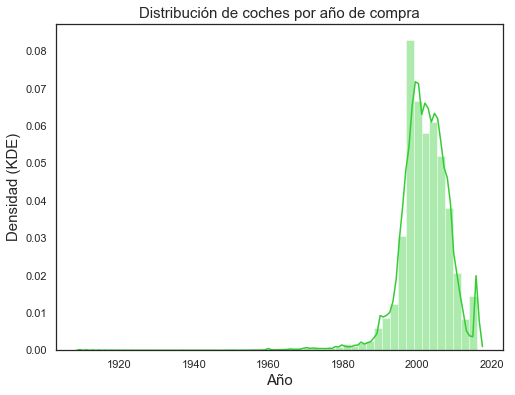

In [3]:
# Histograma, distribución.
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribución de coches por año de compra', fontsize= 15)
plt.ylabel("Densidad (KDE)", fontsize= 15)
plt.xlabel("Año", fontsize= 15)
plt.show()

## Introducción a Seaborn 
Estas librerías gráficas se apoyan en Matplotlib y proporcionan un marco muy potente para representar datasets, por lo que conviene saber usarlas.

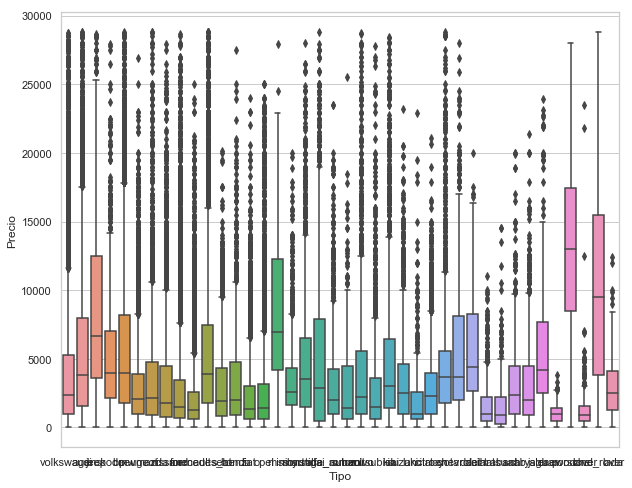

In [19]:
import seaborn as sns


sns.set() #Reinicia el estilo
sns.set_style("whitegrid") 
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})
#sns.axes_style("whitegrid")
#Devuelve una lista con todos los parámetros. Muy útil

# Boxplots, seguimos con los datos de coches -------------------
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8)) #Aprovecho para especificar el tamaño de la gráfica

sns.boxplot(x="brand", y="price", data=df) 

ax.xaxis.set_label_text("Tipo")
ax.yaxis.set_label_text("Precio")
plt.show() 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


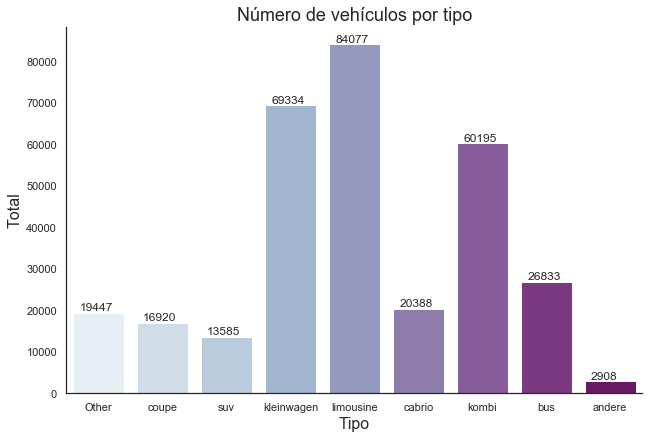

In [5]:
# Número de coches vendidos -------------------
sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
# Decoración
g.ax.xaxis.set_label_text("Tipo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total", fontdict= {'size':16})
g.ax.set_title("Número de vehículos por tipo",fontdict= {'size':18})

for p in g.ax.patches: 
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

/home/rafa/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


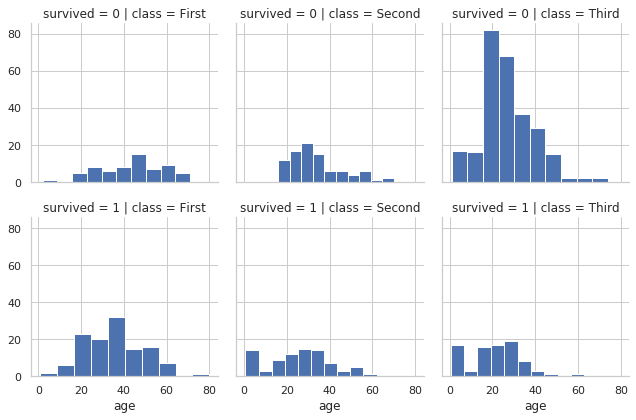

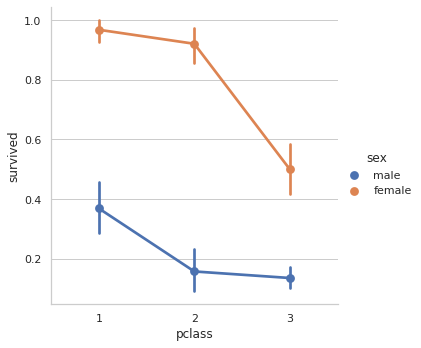

In [9]:
# Lo siento Iris y Titanic :-D

iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
sns.set_style("whitegrid") 

#Esto genera subplots para poder representar relaciones condicionales 
g = sns.FacetGrid(titanic, col="class", row="survived")
# En esos suplots representamos histograma de la edad
g = g.map(plt.hist,"age")

# Variables categóricas -------------------
sns.factorplot(x="pclass",  y="survived", hue="sex", data=titanic)


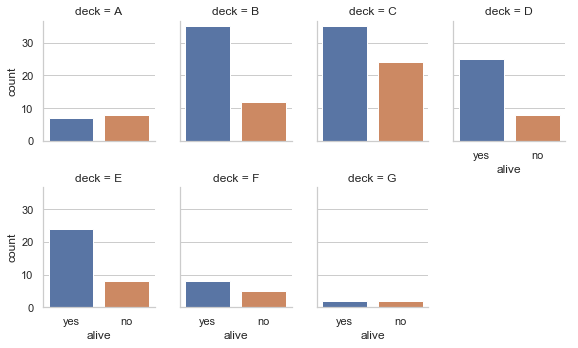

In [7]:
titanic = sns.load_dataset("titanic")
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8)


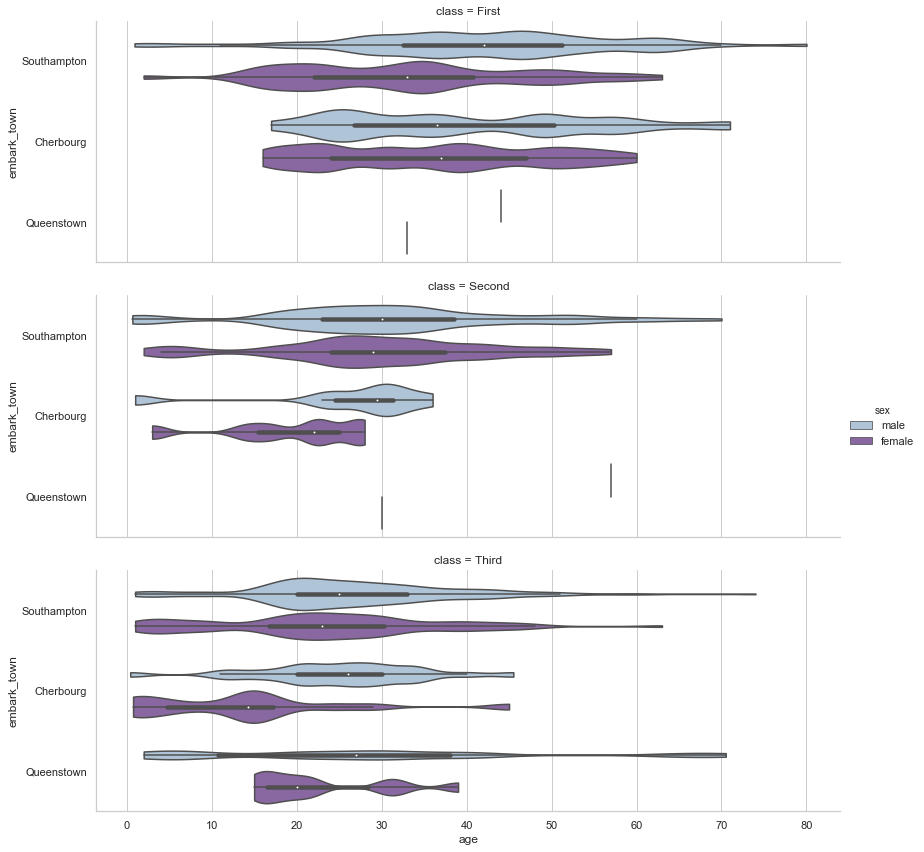

In [24]:
g = sns.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=4, aspect=3, palette="BuPu", 
                kind="violin", dodge=True, cut=0, bw=.2)

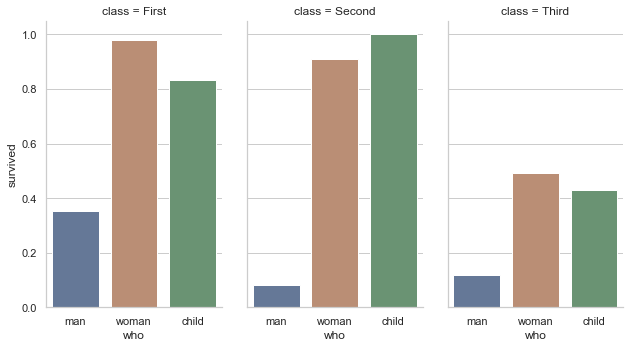

In [9]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)

## Variables categóricas

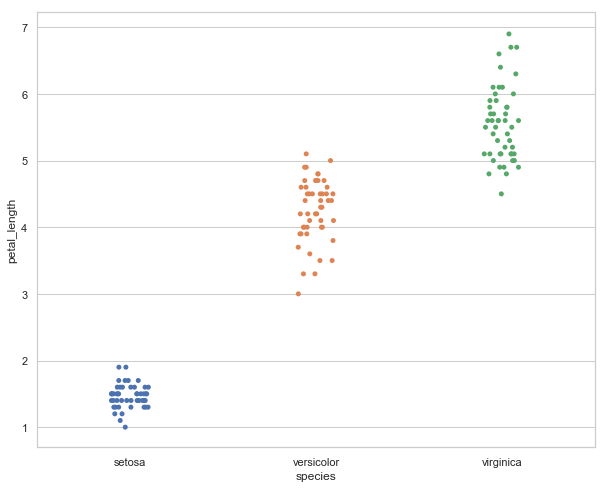

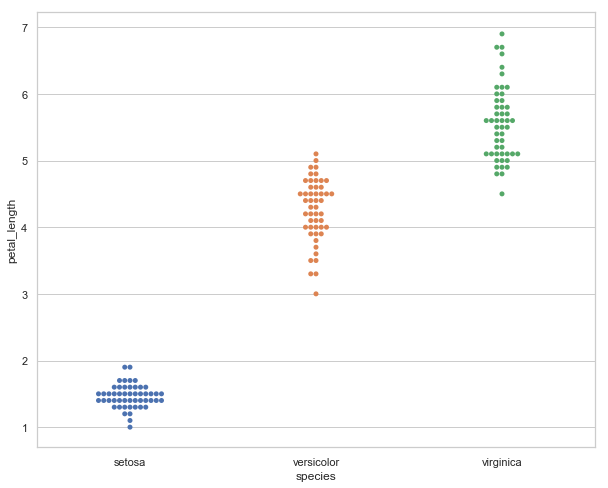

In [10]:
# Scatterplot con variable categórica
fig1, ax1 = plt.subplots(figsize=(10,8))     
sns.stripplot(x="species",  y="petal_length",  data=iris)
 
fig2, ax2 = plt.subplots(figsize=(10,8))     
sns.swarmplot(x="species", y="petal_length",  data=iris)

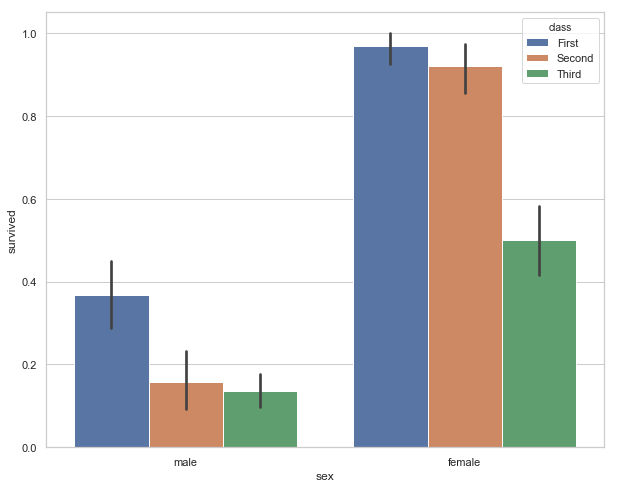

In [11]:
# Estimación e intervalos de confianza con scatter
fig3, ax3 = plt.subplots(figsize=(10,8))     
sns.barplot(x="sex", y="survived",  hue="class",  data=titanic)

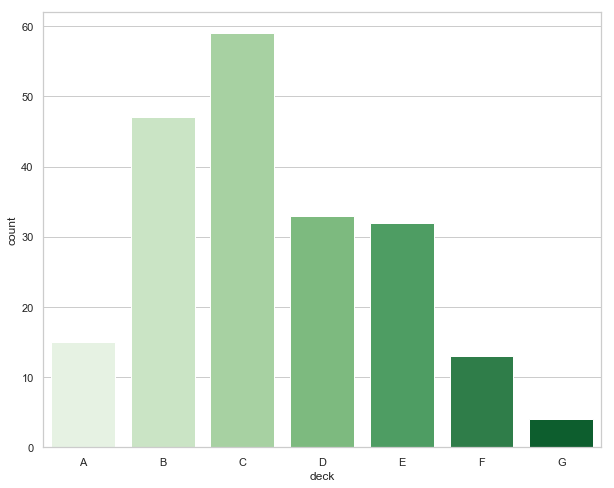

In [25]:
# Número de observaciones
fig4, ax4 = plt.subplots(figsize=(10,8))     
sns.countplot(x="deck",  data=titanic, palette="Greens")


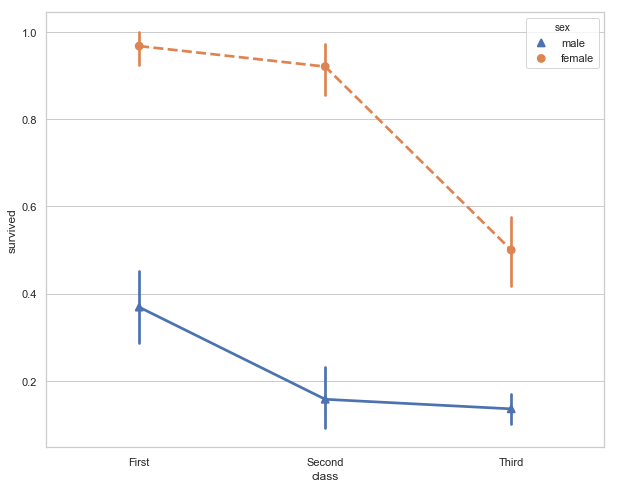

In [27]:
# Estimación e intervalos de confianza como baras rectangulares
fig5, ax5 = plt.subplots(figsize=(10,8))     
sns.pointplot(x="class",  y="survived",  hue="sex",  data=titanic,  markers=["^","o"],linestyles=["-","--"])



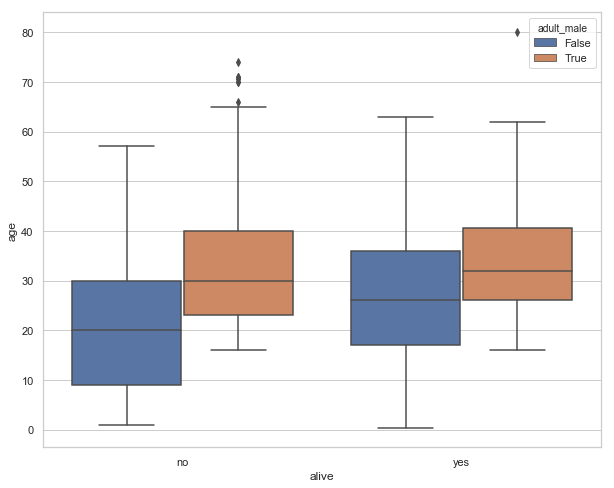

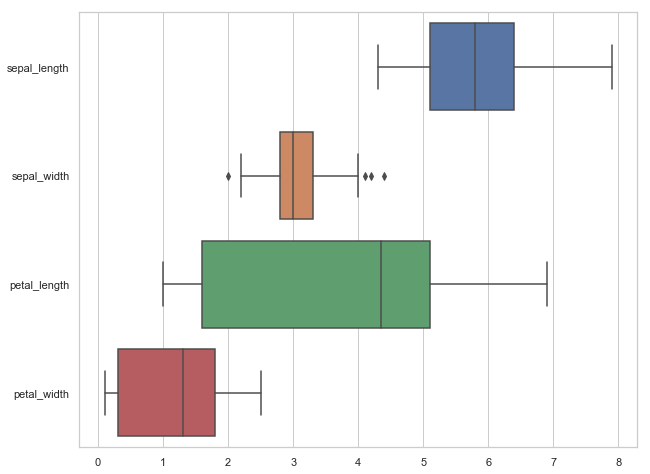

In [14]:
# Boxplot
fig6, ax6 = plt.subplots(figsize=(10,8))     
sns.boxplot(x="alive",  y="age", hue="adult_male", data=titanic)

fig7, ax7 = plt.subplots(figsize=(10,8))     
sns.boxplot(data=iris,orient="h")  



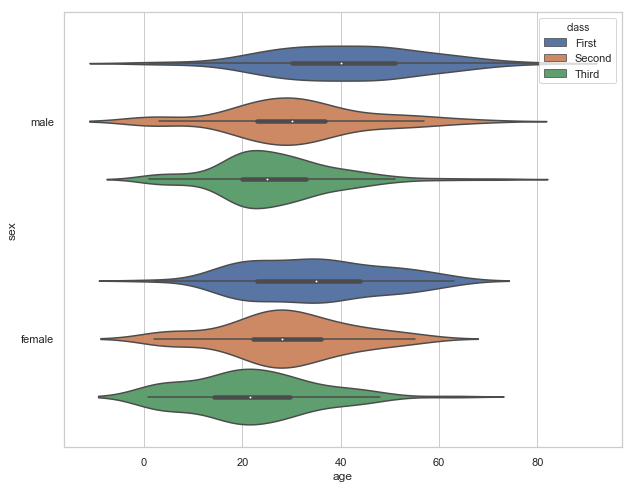

In [28]:
# Violin
fig8, ax8 = plt.subplots(figsize=(10,8))     
sns.violinplot(x="age",  y="sex", hue="class", data=titanic)

## Regresiones

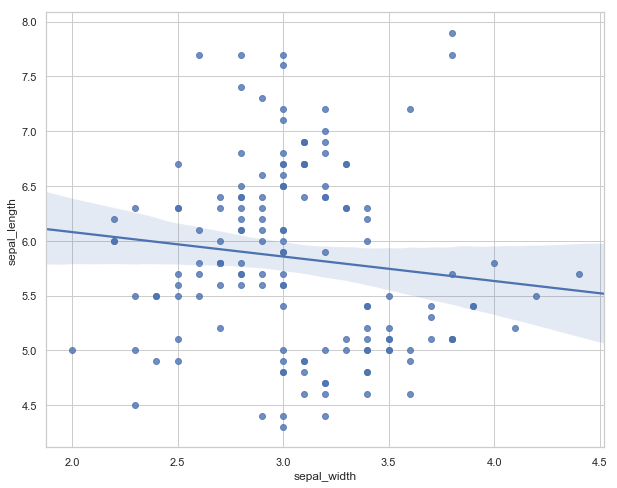

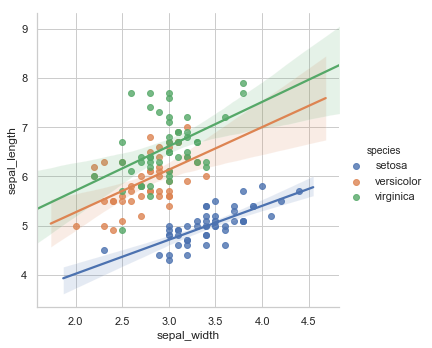

In [16]:
fig9, ax9 = plt.subplots(figsize=(10,8))    
sns.regplot(x="sepal_width",  y="sepal_length",  data=iris)
plt.show(fig9)
sns.lmplot(x="sepal_width", y="sepal_length",   ,data=iris)
plt.show()

## Salvar o visualizar plots

In [17]:
plt.show() 
plt.savefig("foo.png") 
plt.savefig("foo.png",  transparent=True) 

<Figure size 432x288 with 0 Axes>

## Más elementos para EDA

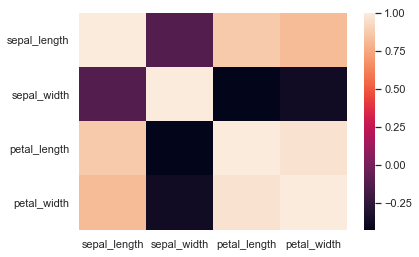

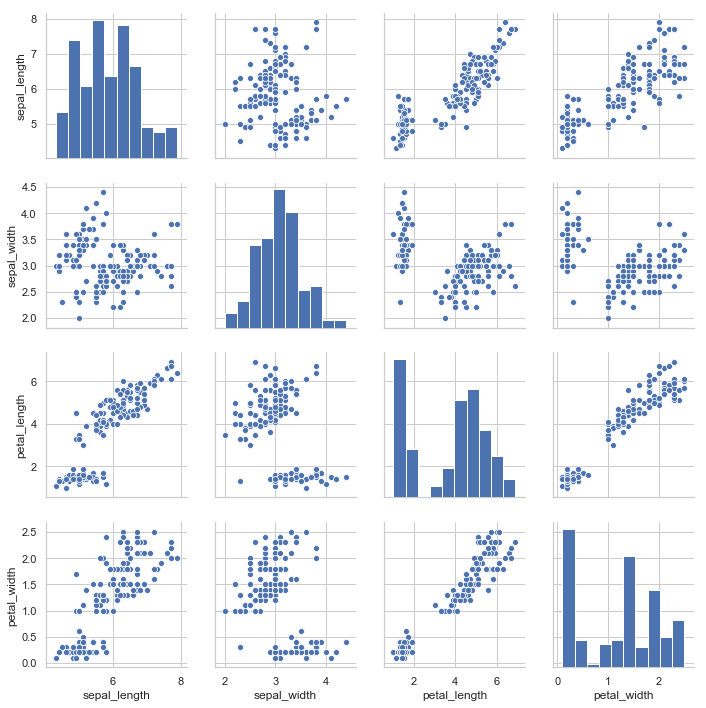

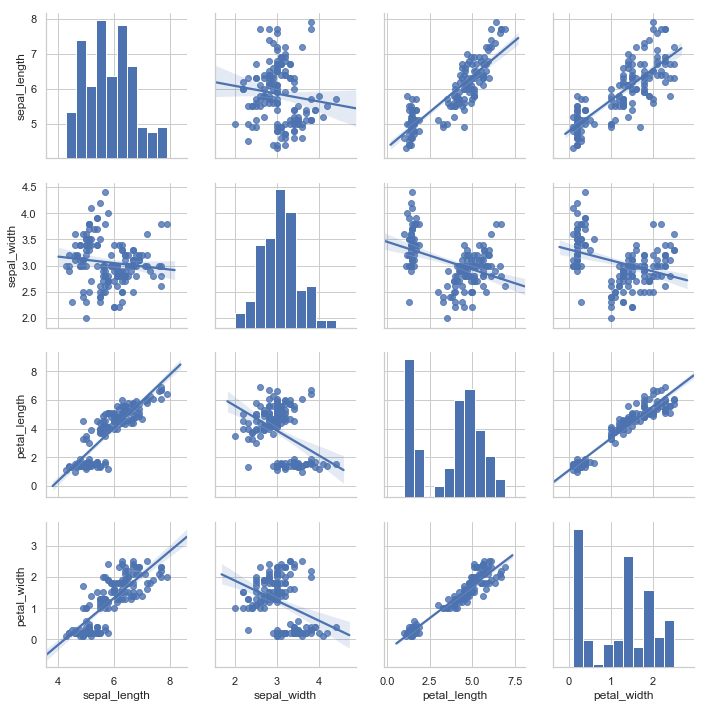

In [18]:
# Correlaciones
corr = iris.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#Más interesante y bonito
sns.pairplot(iris)

# Con regresión
sns.pairplot(iris, kind="reg")

 


## Dónde encontrar más

https://python-graph-gallery.com/

![image.png](image.png)